## Model Training

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer,f1_score, mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

pd.set_option('display.max_columns', 50)

In [8]:
# Load the processed dataset

data = pd.read_csv('/home/med/Desktop/Churn-Prediction-Project/src/data/processed/processed_data.csv')

data.head(5)

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,No,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,45,0,No,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### Churn Distribution

/tmp/ipykernel_3997366/2202953983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


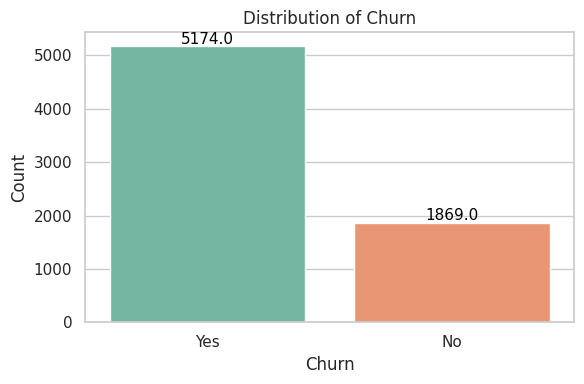

(7043, 19)

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data, palette='Set2')

plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
# Annotate the bars with exact counts
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

data.shape

### Train/Test Split


In [14]:
# Train-test split
# Train 80% , Test 20%

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

print(f"Training dataset size : {X_train.shape}")
print(f"Test dataset size : {X_test.shape}")

Training dataset size : (5634, 18)
Test dataset size : (1409, 18)
